In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
use_monthly_aggregation = False #True, lo divide en meses, False, lo deja anual
time_key_for_plot = 'month' if use_monthly_aggregation == True else 'year'
discount_rate = 0.07

# base_route = "C:\Users\maty_\Desktop\Magister\Tesis\Scripts"
base_route = "D:\Github\switch_uai_scripts"
study_cases = {
    "Modelos_SEN_finals/EEN 1 EEC 1 (Transicion Acelerada)": "TA",
    "Modelos_SEN_finals/EEN 0 EEC 0 (Rumbo CNprueba)": "CN",
    "Modelos_SEN_finals/EEN -1 EEC -1 (Recuperacion Lenta)": "RL"
    }
inputs_path = "inputs"
outputs_path = "outputs"

periods = [2029, 2030, 2031, 2033, 2040, 2050]

technologies_interest = ["Bomb", "CSP-TES", "TES", "CAES", "ESS"]

<>:6: SyntaxWarning: invalid escape sequence '\G'
<>:6: SyntaxWarning: invalid escape sequence '\G'
C:\Users\PC\AppData\Local\Temp\ipykernel_48656\2901977786.py:6: SyntaxWarning: invalid escape sequence '\G'
  base_route = "D:\Github\switch_uai_scripts"


In [19]:
# Cada consolidado de resultados corresponde a un year tipo para su periodo correspondiente, por lo que no es necesario escalar mas que por la cantidad de years
consolidated_costs = pd.DataFrame()
consolidated_gen_data = pd.DataFrame()
for study_case in study_cases:
    file_path_gen_build_costs = fr'{base_route}\{study_case}\{inputs_path}\gen_build_costs.csv'
    gen_build_costs_data = pd.read_csv(file_path_gen_build_costs)
    file_path_gen_info = fr'{base_route}\{study_case}\{inputs_path}\gen_info.csv'
    gen_info_data = pd.read_csv(file_path_gen_info)
    gen_info_data = gen_info_data[gen_info_data["gen_tech"].isin(technologies_interest)]
    gen_info_data["scenario"] = study_cases[study_case]
    consolidated_gen_data = pd.concat([consolidated_gen_data, gen_info_data])
    filtered_cost = gen_build_costs_data[gen_build_costs_data["gen_overnight_cost"] != 0].copy()
    filtered_cost = filtered_cost.rename(columns={"build_year": "PERIOD"})
    filtered_cost["scenario"] = study_cases[study_case]
    consolidated_costs = pd.concat([consolidated_costs, filtered_cost])

consolidated_gen_data[consolidated_gen_data["scenario"] == "TA"]

,GENERATION_PROJECT,gen_tech,gen_load_zone,gen_connect_cost_per_mw,gen_capacity_limit_mw,gen_full_load_heat_rate,gen_variable_om,gen_max_age,gen_min_build_capacity,gen_scheduled_outage_rate,...,gen_tes_duration,gen_can_provide_cap_reserves,csp_tes_capacity_upper_mwht,csp_sf_tes_efficiency,csp_tes_efficiency,csp_tes_pb_efficiency,csp_sf_tes_pb_efficiency,csp_pb_efficiency,peak_demand_gen_max_percent,scenario
36,Bomb_Antofagasta2_8h,Bomb,Antofagasta_2,0.0,2000.0,.,0.0,60,0,0.032877,...,.,1,.,.,.,.,.,.,1.00,TA
37,Bomb_Antofagasta2_10h,Bomb,Antofagasta_2,0.0,2000.0,.,0.0,60,0,0.032877,...,.,1,.,.,.,.,.,.,1.00,TA
38,Bomb_Antofagasta2_14h,Bomb,Antofagasta_2,0.0,2000.0,.,0.0,60,0,0.032877,...,.,1,.,.,.,.,.,.,1.00,TA
39,Bomb_Antofagasta2_24h,Bomb,Antofagasta_2,0.0,2000.0,.,0.0,60,0,0.032877,...,.,1,.,.,.,.,.,.,1.00,TA
40,Bomb_Antofagasta3_8h,Bomb,Antofagasta_3,0.0,2000.0,.,0.0,60,0,0.032877,...,.,1,.,.,.,.,.,.,1.00,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,BESS Víctor Jara,ESS,Tarapaca_2,0.0,200.0,.,0.0,30,0,0.032877,...,.,5,.,.,.,.,.,.,1.00,TA
1503,BESS Huatacondo,ESS,Tarapaca,0.0,98.0,.,0.0,30,0,0.032877,...,.,1,.,.,.,.,.,.,0.81,TA
1504,BESS Livorno,ESS,Valparaiso,0.0,5.0,.,0.0,30,0,0.032877,...,.,5,.,.,.,.,.,.,1.00,TA
1505,BESS San Marcos,ESS,Arica y Parinacota,0.0,2.9,.,0.0,30,0,0.032877,...,.,1,.,.,.,.,.,.,0.81,TA


In [20]:
consolidated_gen_data.loc[gen_info_data['gen_tech'] == 'TES', 'gen_storage_energy_to_power_ratio'] = gen_info_data['gen_tes_duration']
consolidated_gen_data.loc[gen_info_data['gen_tech'] == 'CSP-TES', 'gen_storage_energy_to_power_ratio'] = gen_info_data['csp_tes_capacity_upper_mwht']

In [21]:
df_merge_cost_build_and_gen_tech = pd.merge(consolidated_costs, consolidated_gen_data[["GENERATION_PROJECT", "scenario", "gen_tech", "gen_storage_energy_to_power_ratio"]],  on=['GENERATION_PROJECT', 'scenario'], how='inner')
df_merge_cost_build_and_gen_tech["gen_overnight_cost_mwh"] = df_merge_cost_build_and_gen_tech["gen_overnight_cost"] / df_merge_cost_build_and_gen_tech["gen_storage_energy_to_power_ratio"].astype(float)
df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == "CAES"]

,GENERATION_PROJECT,PERIOD,gen_overnight_cost,gen_storage_energy_overnight_cost,gen_fixed_om,scenario,gen_tech,gen_storage_energy_to_power_ratio,gen_overnight_cost_mwh
567,CAES_Ancoa500_250_6h,2026,1513671,0,15137,TA,CAES,6,252278.500000
568,CAES_Ancoa500_250_6h,2029,1434696,0,14347,TA,CAES,6,239116.000000
569,CAES_Ancoa500_250_6h,2030,1434696,0,14347,TA,CAES,6,239116.000000
570,CAES_Ancoa500_250_6h,2031,1434696,0,14347,TA,CAES,6,239116.000000
571,CAES_Ancoa500_250_6h,2033,1354247,0,13542,TA,CAES,6,225707.833333
...,...,...,...,...,...,...,...,...,...
4343,CAES_Pichirropulli500_250_14h,2030,1664540,0,16646,RL,CAES,14,118895.714286
4344,CAES_Pichirropulli500_250_14h,2031,1664540,0,16646,RL,CAES,14,118895.714286
4345,CAES_Pichirropulli500_250_14h,2033,1571201,0,15713,RL,CAES,14,112228.642857
4346,CAES_Pichirropulli500_250_14h,2040,1475976,0,14760,RL,CAES,14,105426.857143


C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


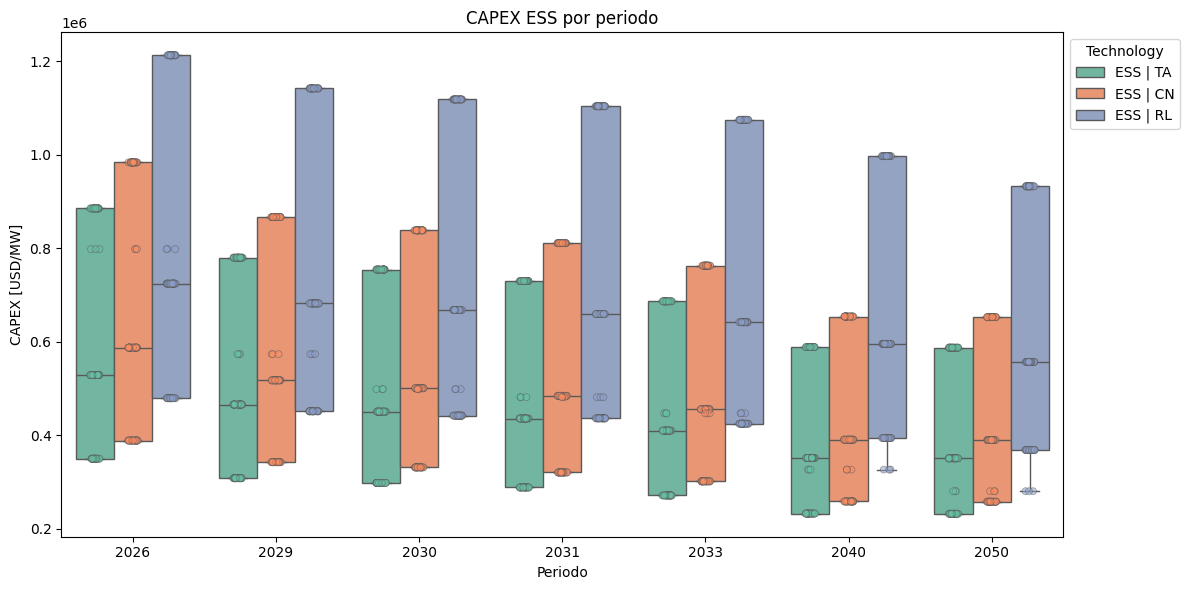

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:46: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


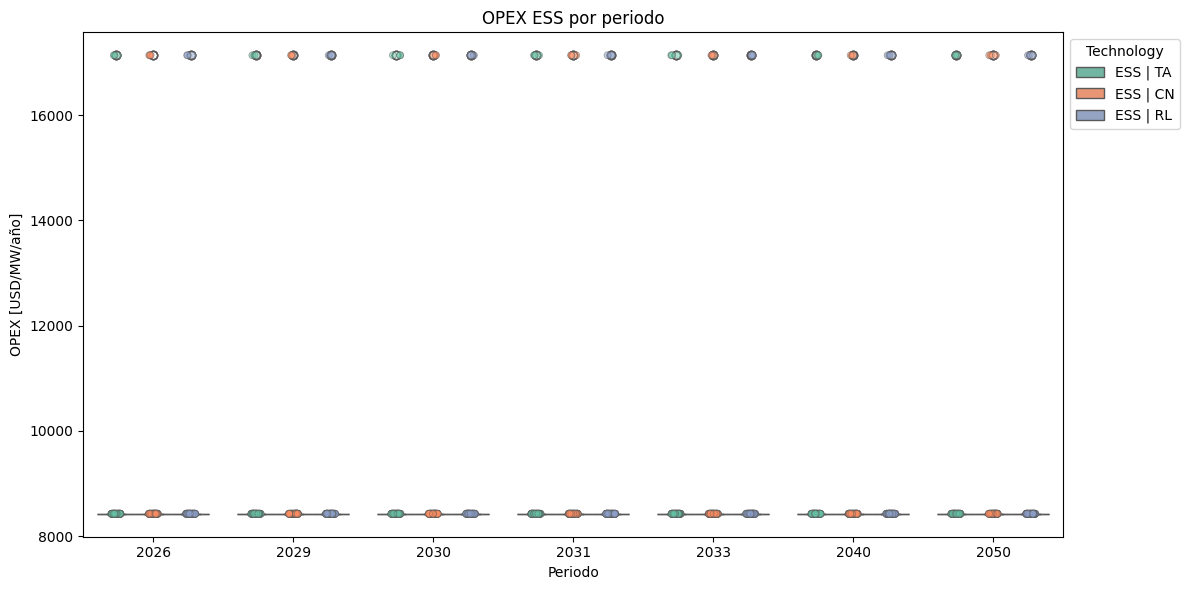

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


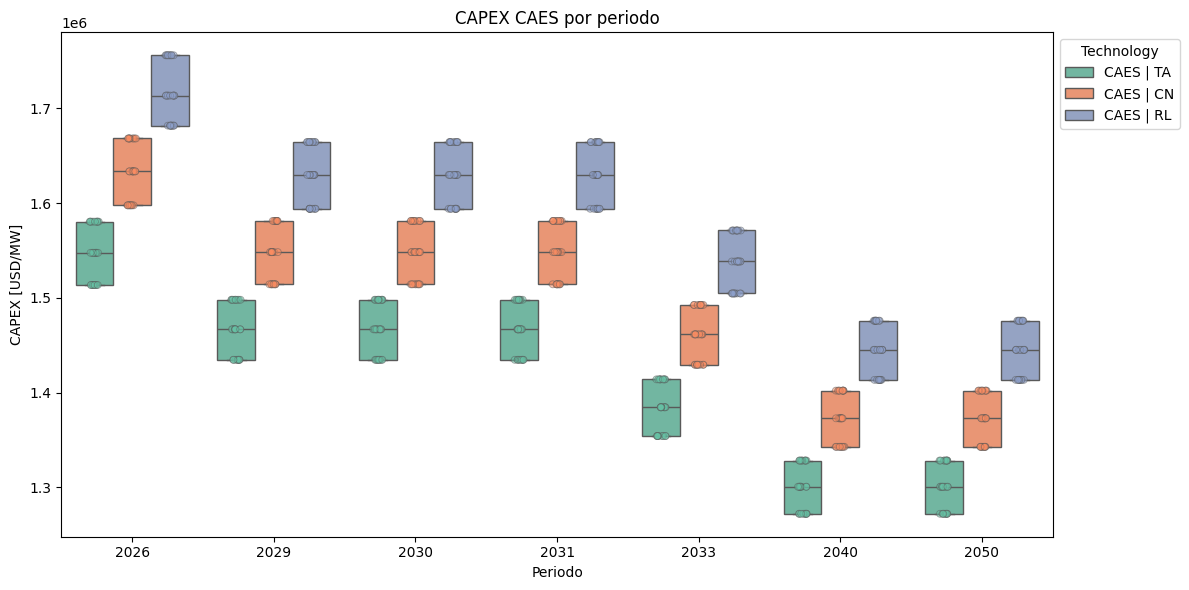

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:46: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


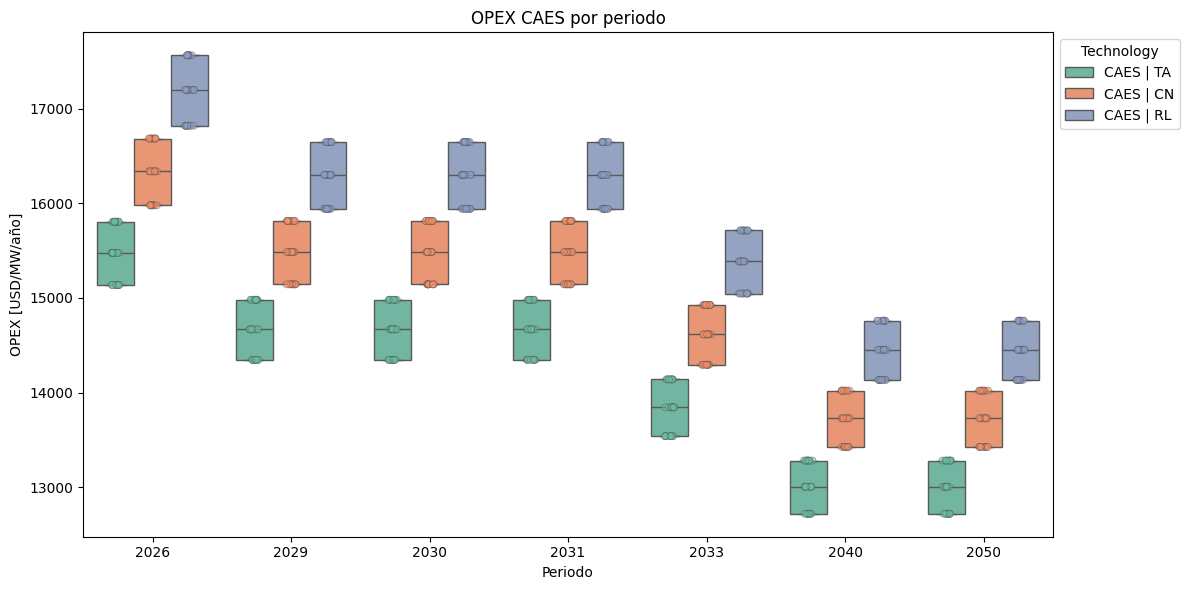

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


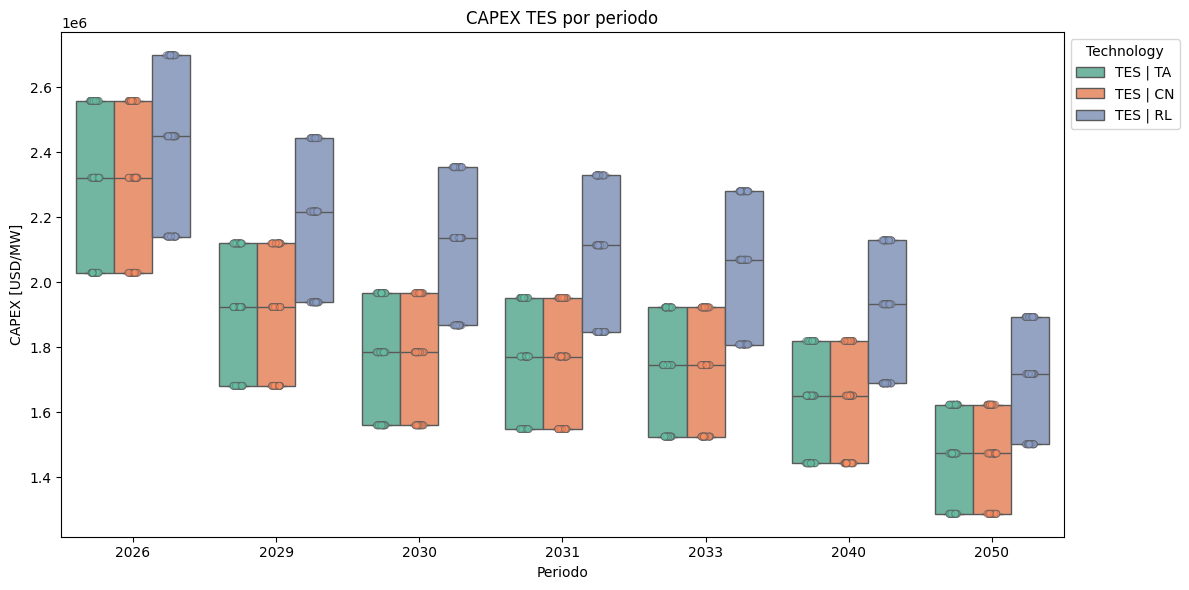

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:46: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


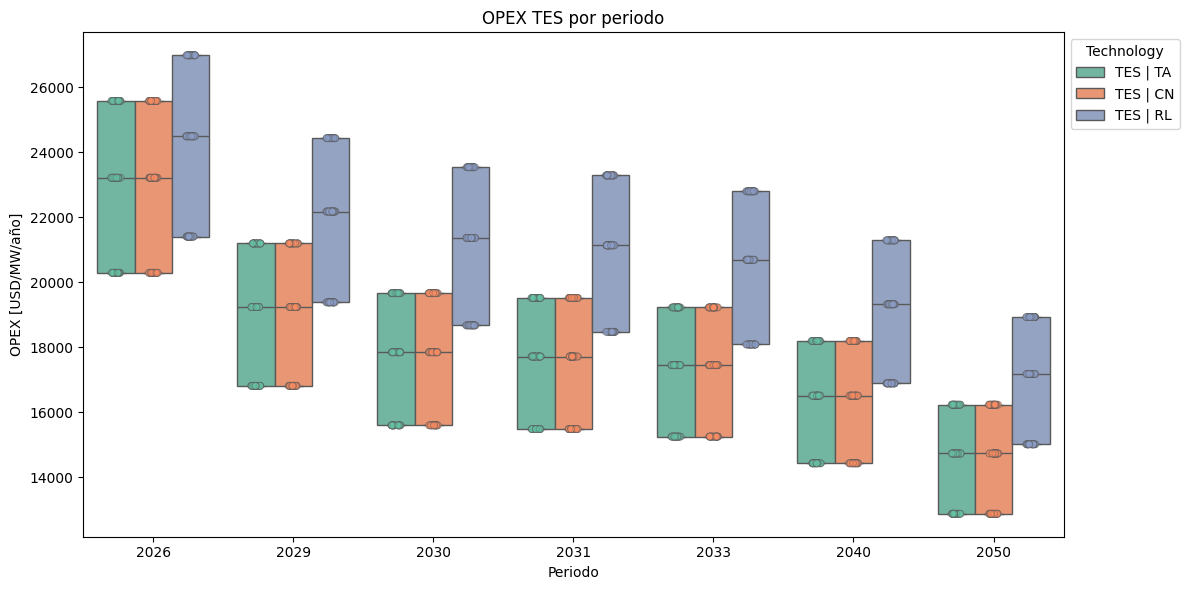

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


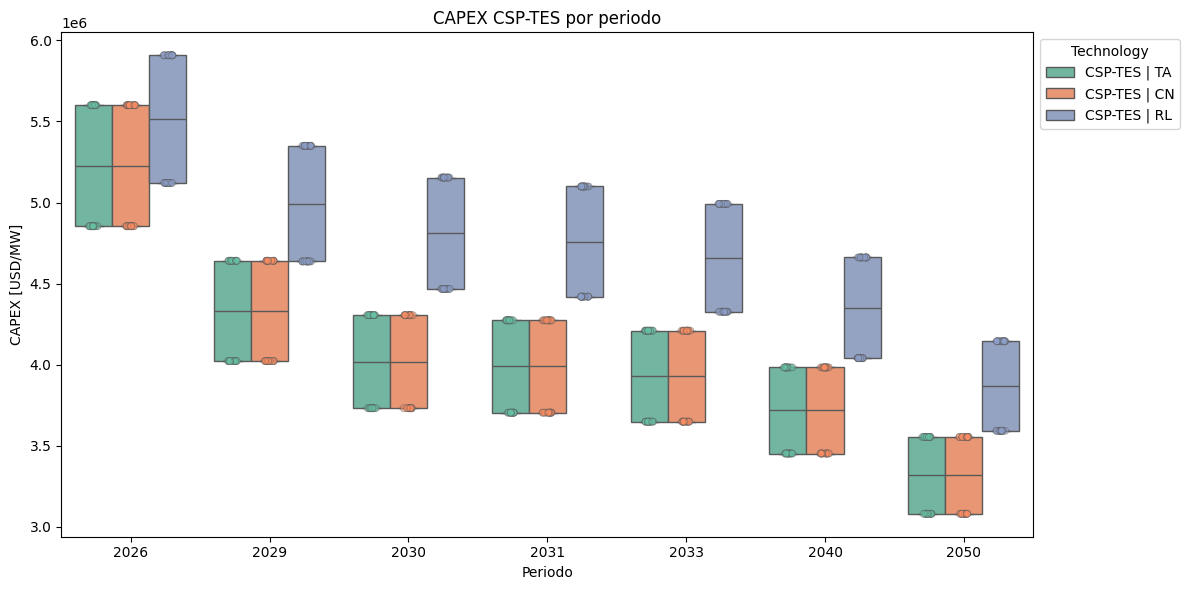

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:46: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


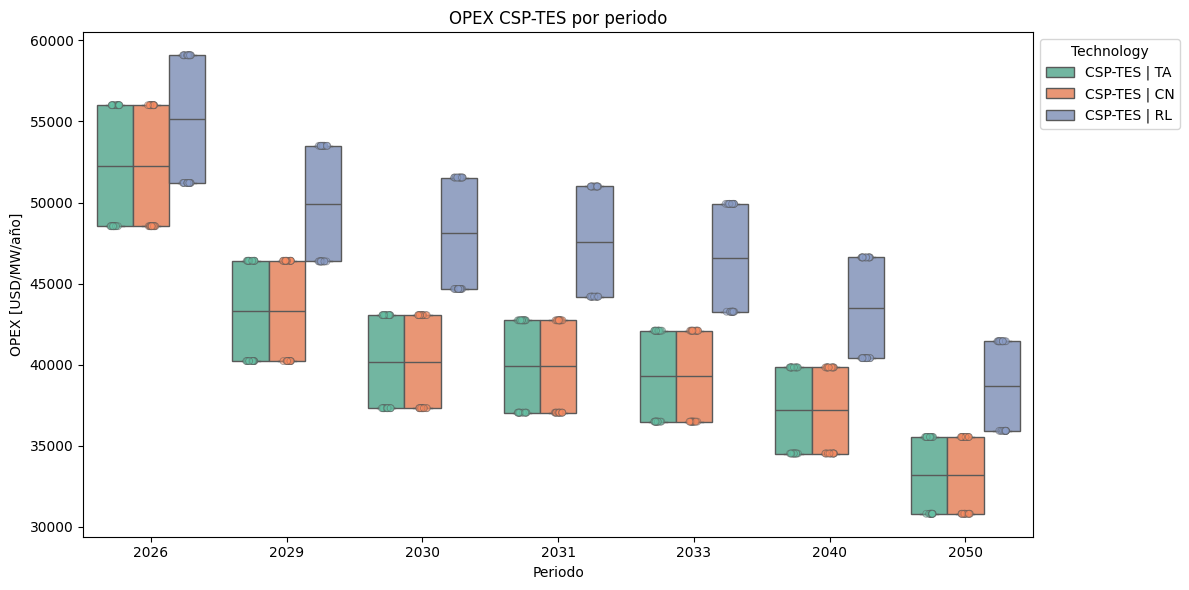

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


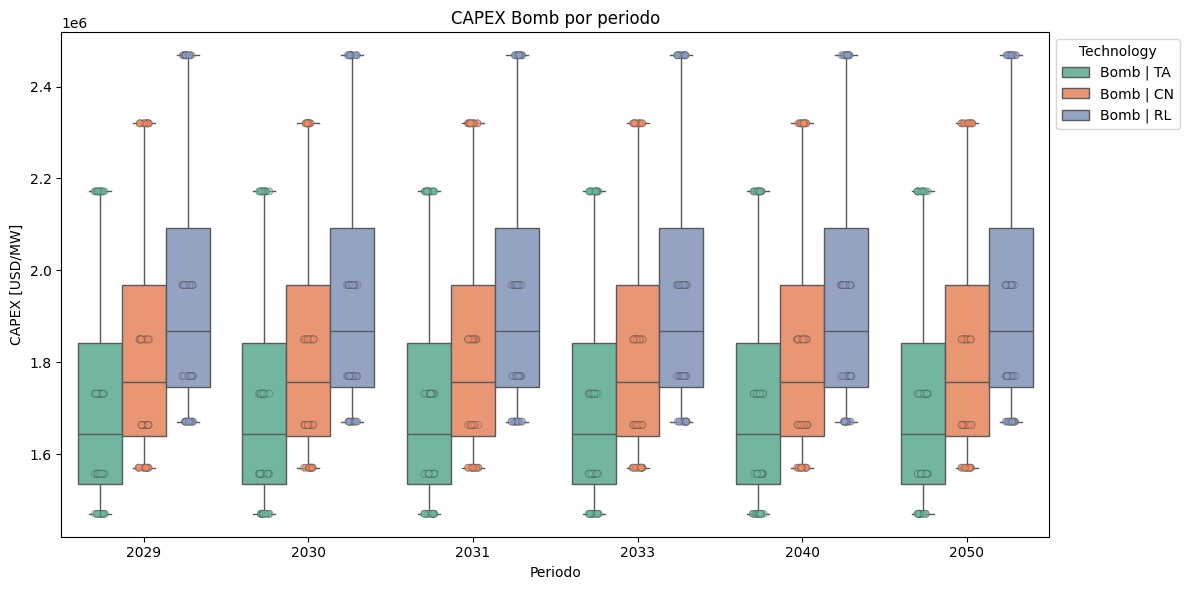

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\624376241.py:46: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


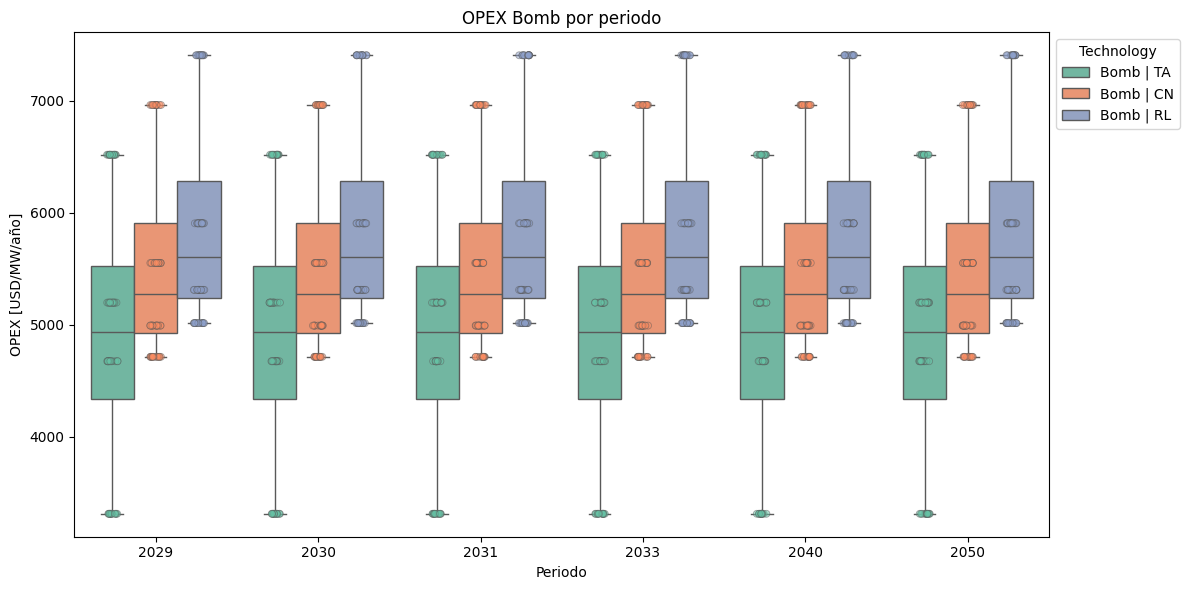

In [22]:
df_merge_cost_build_and_gen_tech['group'] = (
    df_merge_cost_build_and_gen_tech['gen_tech'] + " | " + df_merge_cost_build_and_gen_tech['scenario'].astype(str)
)

for tech in df_merge_cost_build_and_gen_tech["gen_tech"].unique():
    # Plot for CAPEX
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == tech],
        x="PERIOD",
        y="gen_overnight_cost",
        hue="group",
        palette="Set2",
        dodge=True,
    )
    sns.stripplot(
        data=df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == tech],
        x="PERIOD",
        y="gen_overnight_cost",
        hue="group",
        palette="Set2",
        dodge=True,
        alpha=0.5,
        linewidth=0.6,
        edgecolor="gray",
        legend=False,
    )

    plt.title(f"CAPEX {tech} por periodo")
    plt.xlabel("Periodo")
    plt.ylabel("CAPEX [USD/MW]")
    plt.legend(title="Technology", loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

    # Plot for OPEX
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == tech],
        x="PERIOD",
        y="gen_fixed_om",
        hue="group",
        palette="Set2",
        dodge=True,
    )
    sns.stripplot(
        data=df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == tech],
        x="PERIOD",
        y="gen_fixed_om",
        hue="group",
        palette="Set2",
        dodge=True,
        alpha=0.5,
        linewidth=0.6,
        edgecolor="gray",
        legend=False,
    )

    plt.title(f"OPEX {tech} por periodo")
    plt.xlabel("Periodo")
    plt.ylabel("OPEX [USD/MW/año]")
    plt.legend(title="Technology", loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\1146511661.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


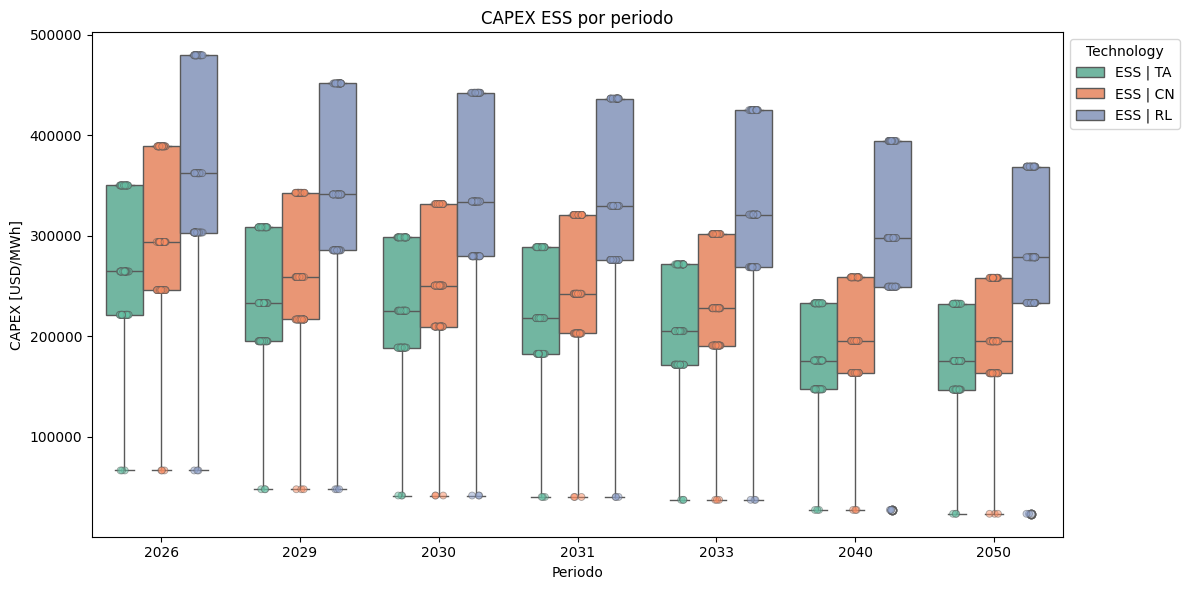

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\1146511661.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


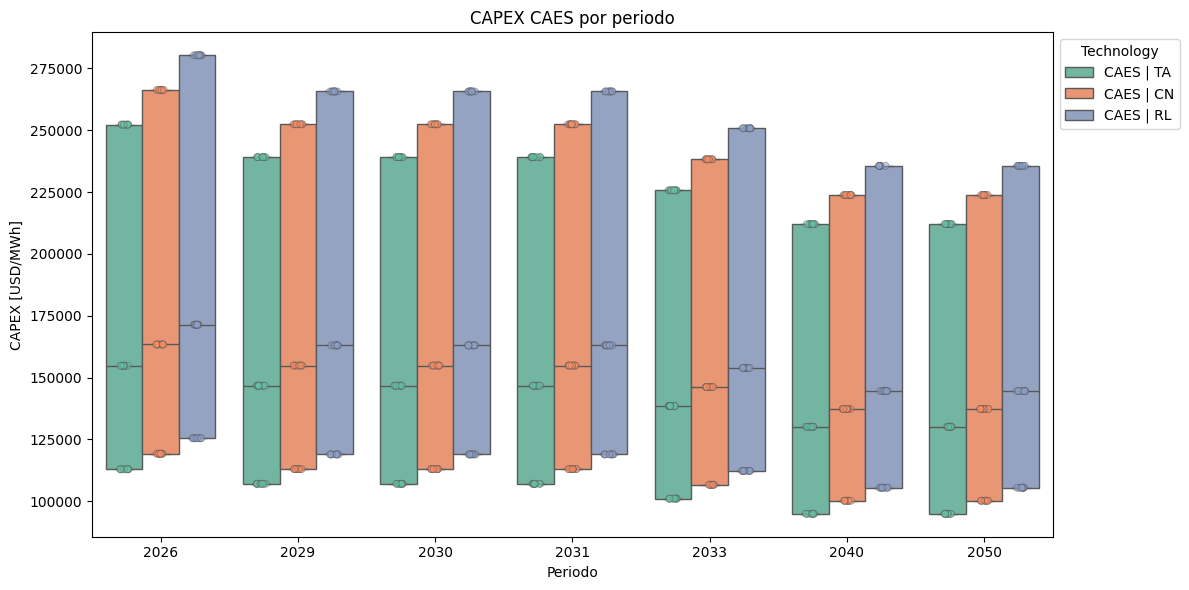

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\1146511661.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


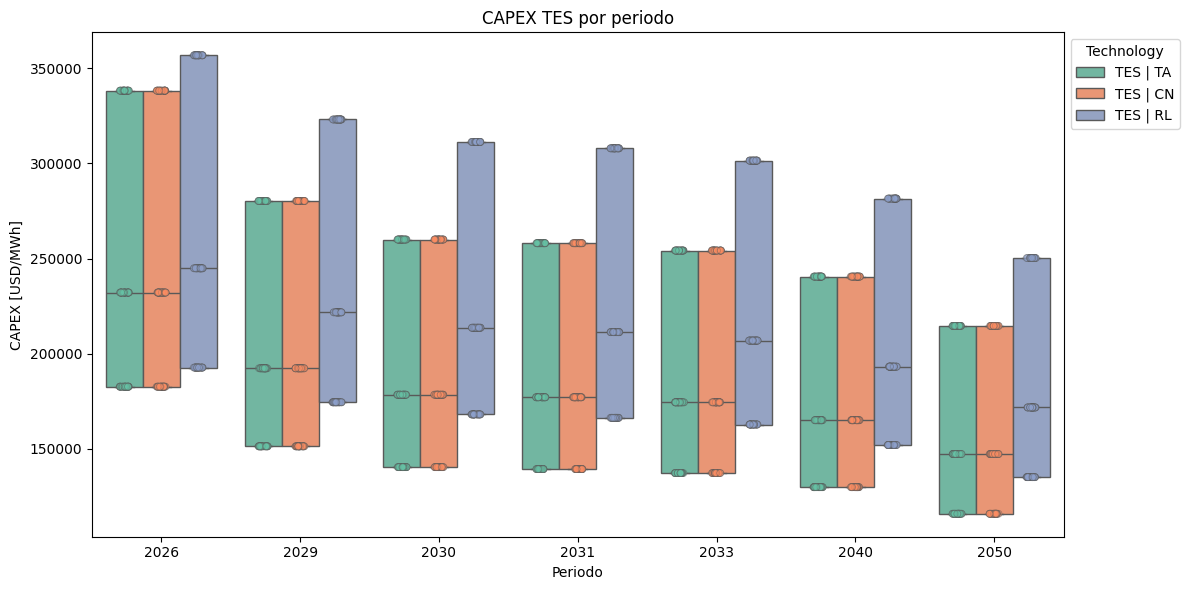

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\1146511661.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


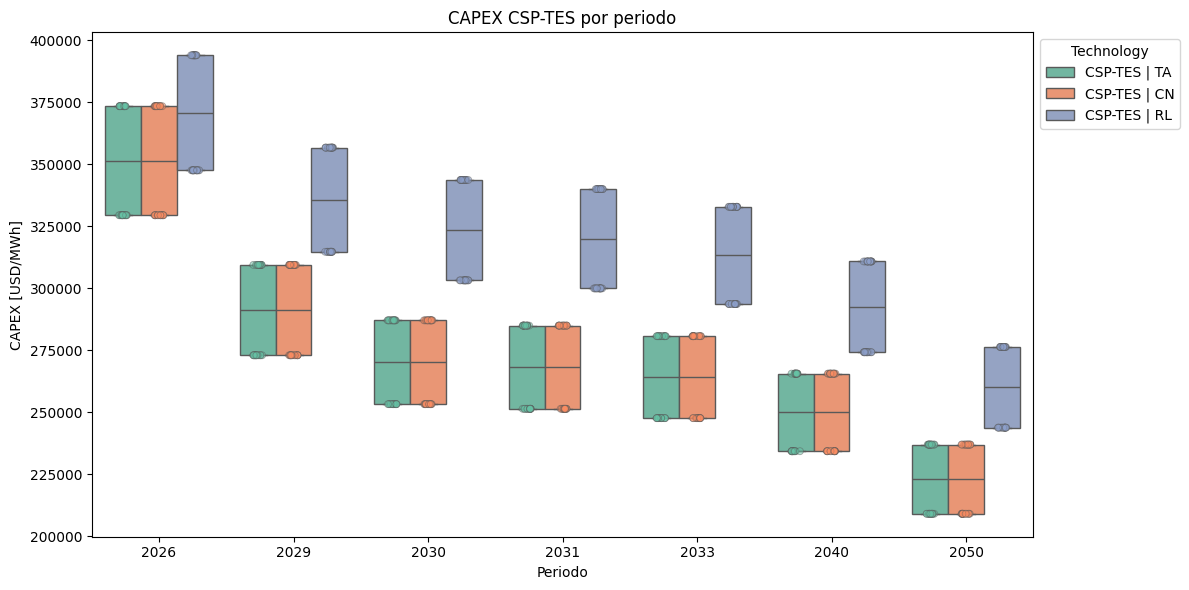

C:\Users\PC\AppData\Local\Temp\ipykernel_48656\1146511661.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


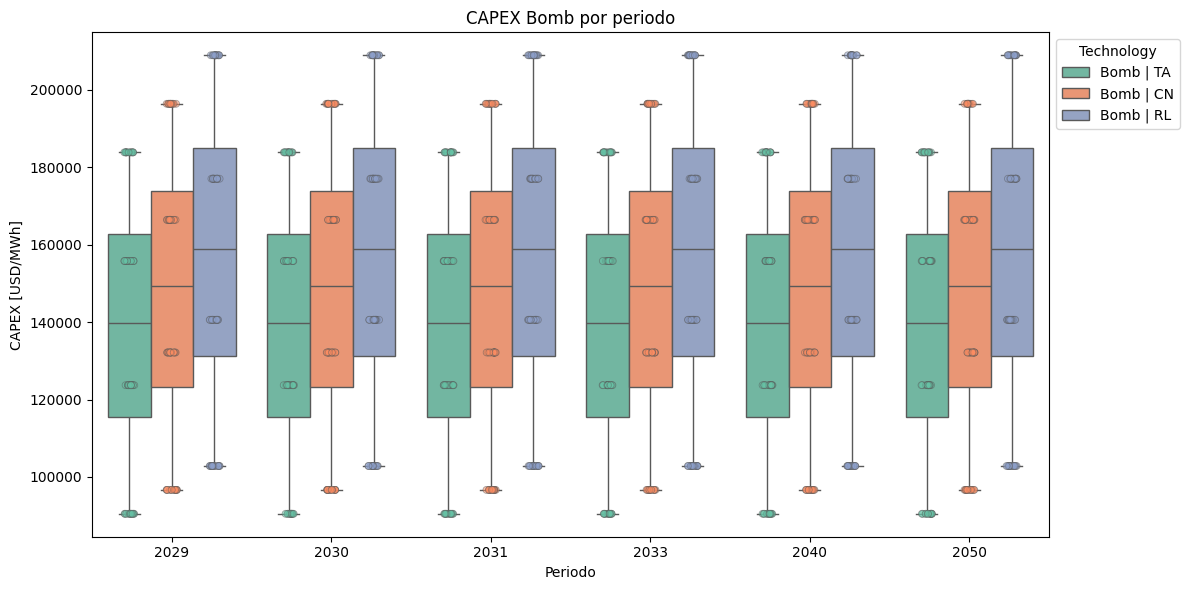

In [24]:
df_merge_cost_build_and_gen_tech['group'] = (
    df_merge_cost_build_and_gen_tech['gen_tech'] + " | " + df_merge_cost_build_and_gen_tech['scenario'].astype(str)
)

for tech in df_merge_cost_build_and_gen_tech["gen_tech"].unique():
    # Plot for CAPEX
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == tech],
        x="PERIOD",
        y="gen_overnight_cost_mwh",
        hue="group",
        palette="Set2",
        dodge=True,
    )
    sns.stripplot(
        data=df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == tech],
        x="PERIOD",
        y="gen_overnight_cost_mwh",
        hue="group",
        palette="Set2",
        dodge=True,
        alpha=0.5,
        linewidth=0.6,
        edgecolor="gray",
        legend=False,
    )

    plt.title(f"CAPEX {tech} por periodo")
    plt.xlabel("Periodo")
    plt.ylabel("CAPEX [USD/MWh]")
    plt.legend(title="Technology", loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

    # # Plot for OPEX
    # plt.figure(figsize=(12, 6))
    # sns.boxplot(
    #     data=df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == tech],
    #     x="PERIOD",
    #     y="gen_fixed_om",
    #     hue="group",
    #     palette="Set2",
    #     dodge=True,
    # )
    # sns.stripplot(
    #     data=df_merge_cost_build_and_gen_tech[df_merge_cost_build_and_gen_tech["gen_tech"] == tech],
    #     x="PERIOD",
    #     y="gen_fixed_om",
    #     hue="group",
    #     palette="Set2",
    #     dodge=True,
    #     alpha=0.5,
    #     linewidth=0.6,
    #     edgecolor="gray",
    #     legend=False,
    # )

    # plt.title(f"OPEX {tech} por periodo")
    # plt.xlabel("Periodo")
    # plt.ylabel("OPEX [USD/MW/año]")
    # plt.legend(title="Technology", loc="upper left", bbox_to_anchor=(1, 1))
    # plt.tight_layout()
    # plt.show()